In [3]:
# to handle datasets
import pandas as pd
import numpy as np

# for plotting
import matplotlib.pyplot as plt
%matplotlib inline

# to divide train and test set
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# feature scaling
from sklearn.preprocessing import MinMaxScaler

# to build the models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

# to evaluate the models
from sklearn.metrics import roc_auc_score
from sklearn import metrics

pd.pandas.set_option('display.max_columns', None)

import warnings
warnings.filterwarnings('ignore')

In [4]:
# load dataset
data = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


### Types of variables

Let's go ahead and find out what types of variables there are in this dataset

In [5]:
# let's inspect the types of variables in pandas
data.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

There are a mixture of categorical and numerical variables. Numerical are those of type int and float. Categorical those of type object

In [6]:
print('Number of EmployeeNumber labels: ', len(data.EmployeeNumber.unique()))
print('Number of employees in the dataset: ', len(data))

Number of EmployeeNumber labels:  1470
Number of employees in the dataset:  1470


EmployeeNumber is a unique identifier for each of the employees. Thus this is not a variable that we can use.

In [7]:
# find categorical variables
categorical = [var for var in data.columns if data[var].dtype == 'O']
print('There are {} categorical variables'.format(len(categorical)))

There are 9 categorical variables


In [8]:
# find numerical variables
numerical = [var for var in data.columns if data[var].dtype != 'O']
print('There are {} numerical variables'.format(len(numerical)))

There are 26 numerical variables


In [9]:
# view of categorical variables
data[categorical].head()

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
0,Yes,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Y,Yes
1,No,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,Y,No
2,Yes,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Y,Yes
3,No,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Y,Yes
4,No,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No


In [10]:
# view of numerical variables
data[numerical].head()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1102,1,2,1,1,2,94,3,2,4,5993,19479,8,11,3,1,80,0,8,0,1,6,4,0,5
1,49,279,8,1,1,2,3,61,2,2,2,5130,24907,1,23,4,4,80,1,10,3,3,10,7,1,7
2,37,1373,2,2,1,4,4,92,2,1,3,2090,2396,6,15,3,2,80,0,7,3,3,0,0,0,0
3,33,1392,3,4,1,5,4,56,3,1,3,2909,23159,1,11,3,3,80,0,8,3,3,8,7,3,0
4,27,591,2,1,1,7,1,40,3,1,2,3468,16632,9,12,3,4,80,1,6,3,3,2,2,2,2


- 5 continuos variables: Age, DailyRate, HourlyRate, MonthlyIncome, MonthlyRate
- 1 Id variable: EmployeeNumber (it is a label for each of the employees)
- 18 discrete variables: Rest all of them 

### Types of problems within the variables

#### Missing values

In [11]:
# let's visualize the percentage of missing values
data.isnull().mean()

Age                         0.0
Attrition                   0.0
BusinessTravel              0.0
DailyRate                   0.0
Department                  0.0
DistanceFromHome            0.0
Education                   0.0
EducationField              0.0
EmployeeCount               0.0
EmployeeNumber              0.0
EnvironmentSatisfaction     0.0
Gender                      0.0
HourlyRate                  0.0
JobInvolvement              0.0
JobLevel                    0.0
JobRole                     0.0
JobSatisfaction             0.0
MaritalStatus               0.0
MonthlyIncome               0.0
MonthlyRate                 0.0
NumCompaniesWorked          0.0
Over18                      0.0
OverTime                    0.0
PercentSalaryHike           0.0
PerformanceRating           0.0
RelationshipSatisfaction    0.0
StandardHours               0.0
StockOptionLevel            0.0
TotalWorkingYears           0.0
TrainingTimesLastYear       0.0
WorkLifeBalance             0.0
YearsAtC

In [12]:
# let's visualize some unnecessary fields clearly visible from the raw data in input csv file
for var in ['EmployeeCount', 'Over18', 'StandardHours']:
    print(var, ' values: ', data[var].unique())

EmployeeCount  values:  [1]
Over18  values:  ['Y']
StandardHours  values:  [80]


Looking at the single unique label of the above fields, it's clear that they're not contributing anything towards the final outcome and hence can be dropped.

In [13]:
# drop unnecessary fields
for var in ['EmployeeCount', 'Over18', 'StandardHours']:
    data.drop(labels = var, inplace = True, axis = 1)

In [14]:
# function returning columns with correlation higher than threshold
def correlation(dataset, threshold):
    col_corr = set() # set of high correlation columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) >= threshold:
                print(corr_matrix.columns[i], " - ", corr_matrix.columns[j], " : ", corr_matrix.iloc[i, j])
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    print(col_corr)
    return col_corr

In [15]:
correlation(data, 0.7)

MonthlyIncome  -  JobLevel  :  0.950299913479854
PerformanceRating  -  PercentSalaryHike  :  0.7735499964012668
TotalWorkingYears  -  JobLevel  :  0.7822078045362802
TotalWorkingYears  -  MonthlyIncome  :  0.7728932462543548
YearsInCurrentRole  -  YearsAtCompany  :  0.7587537366134616
YearsWithCurrManager  -  YearsAtCompany  :  0.7692124251006991
YearsWithCurrManager  -  YearsInCurrentRole  :  0.7143647616385903
{'MonthlyIncome', 'PerformanceRating', 'YearsWithCurrManager', 'TotalWorkingYears', 'YearsInCurrentRole'}


{'MonthlyIncome',
 'PerformanceRating',
 'TotalWorkingYears',
 'YearsInCurrentRole',
 'YearsWithCurrManager'}

In [16]:
# drop highly correlated fields
for var in ['JobLevel', 'TotalWorkingYears', 'YearsInCurrentRole', 'YearsWithCurrManager']:
    data.drop(labels = var, inplace = True, axis = 1)

None of the variables contain any missing data

#### Outliers

In [17]:
numerical = [var for var in data.columns if data[var].dtype != 'O' and var not in['EmployeeNumber']]
numerical

['Age',
 'DailyRate',
 'DistanceFromHome',
 'Education',
 'EnvironmentSatisfaction',
 'HourlyRate',
 'JobInvolvement',
 'JobSatisfaction',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'PercentSalaryHike',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StockOptionLevel',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsSinceLastPromotion']

Text(0, 0.5, 'MonthlyRate')

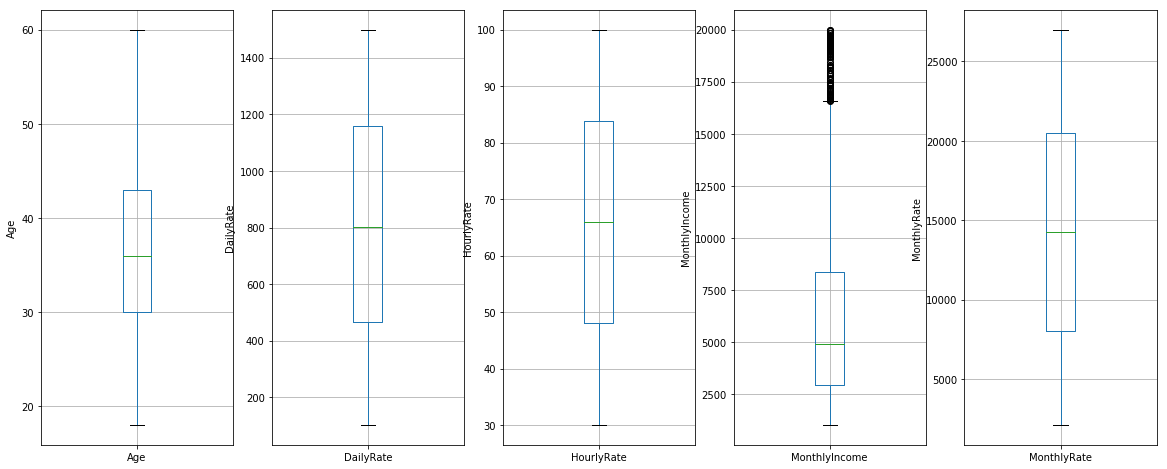

In [18]:
# let's make boxplots to visualize outliers in the continouos variables
# Age, DailyRate, HourlyRate, MonthlyIncome, MonthlyRate

plt.figure(figsize = (20, 8))
plt.subplot(1, 5, 1)
fig = data.boxplot(column = 'Age')
fig.set_title('')
fig.set_ylabel('Age')

plt.subplot(1, 5, 2)
fig = data.boxplot(column = 'DailyRate')
fig.set_title('')
fig.set_ylabel('DailyRate')

plt.subplot(1, 5, 3)
fig = data.boxplot(column = 'HourlyRate')
fig.set_title('')
fig.set_ylabel('HourlyRate')

plt.subplot(1, 5, 4)
fig = data.boxplot(column = 'MonthlyIncome')
fig.set_title('')
fig.set_ylabel('MonthlyIncome')

plt.subplot(1, 5, 5)
fig = data.boxplot(column = 'MonthlyRate')
fig.set_title('')
fig.set_ylabel('MonthlyRate')

Only MonthlyIncome contain outliers. Let's find which of its values are the outliers

Text(0.5, 0, 'MonthlyIncome')

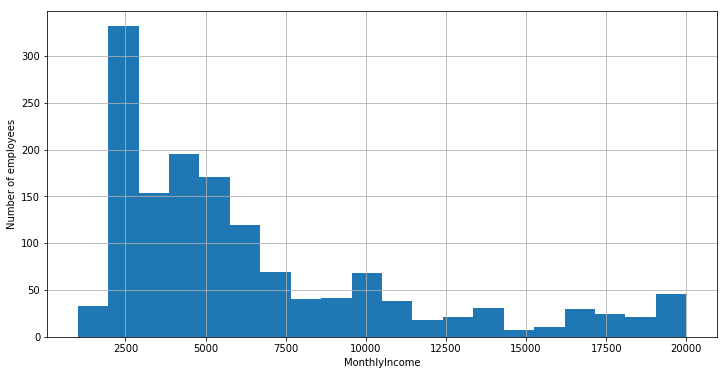

In [19]:
# first we plot the distribution to find out it is Gaussian or skewed.
# Depending on the distribution, we will use the normal assumption or the interquantile
# range to find outliers

plt.figure(figsize = (12, 6))
plt.subplot(1, 1, 1)
fig = data.MonthlyIncome.hist(bins = 20)
fig.set_ylabel('Number of employees')
fig.set_xlabel('MonthlyIncome')

MonthlyIncome seems a little skewed, so I will use the interquantile range or discretisation for it

#### Outliers in discrete variables

Let's calculate the percentage of employees for each of the values inside the discrete variables. I will call outliers, those values that are present in less than 1% of the employees. This is exactly the same as finding rare labels in categorical variables. Discrete variables, in essence can be pre-processed / engineered as if they were categorical.

In [20]:
# get the list of discrete variables
discrete = [var for var in numerical if var not in['Age', 'DailyRate', 'HourlyRate', 'MonthlyIncome', 'MonthlyRate']]
discrete

['DistanceFromHome',
 'Education',
 'EnvironmentSatisfaction',
 'JobInvolvement',
 'JobSatisfaction',
 'NumCompaniesWorked',
 'PercentSalaryHike',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StockOptionLevel',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsSinceLastPromotion']

In [21]:
# outliers in discrete variables
for var in discrete:
    print(data[var].value_counts() / np.float(len(data)))
    print()

2     0.143537
1     0.141497
10    0.058503
9     0.057823
3     0.057143
7     0.057143
8     0.054422
5     0.044218
4     0.043537
6     0.040136
16    0.021769
11    0.019728
24    0.019048
29    0.018367
23    0.018367
18    0.017687
15    0.017687
20    0.017007
25    0.017007
26    0.017007
28    0.015646
19    0.014966
14    0.014286
12    0.013605
17    0.013605
13    0.012925
22    0.012925
21    0.012245
27    0.008163
Name: DistanceFromHome, dtype: float64

3    0.389116
4    0.270748
2    0.191837
1    0.115646
5    0.032653
Name: Education, dtype: float64

3    0.308163
4    0.303401
2    0.195238
1    0.193197
Name: EnvironmentSatisfaction, dtype: float64

3    0.590476
2    0.255102
4    0.097959
1    0.056463
Name: JobInvolvement, dtype: float64

4    0.312245
3    0.300680
1    0.196599
2    0.190476
Name: JobSatisfaction, dtype: float64

1    0.354422
0    0.134014
3    0.108163
2    0.099320
4    0.094558
7    0.050340
6    0.047619
5    0.042857
9    0.035374
8   

**DistanceFromHome**
We can see that values > 26 are rare (present in less than 1% of employees). Thus I will cap this variable at 26 (top-coding).

**YearsAtCompany**
Values > 20 seems rare. So, I'll cap this variable at 20.

**YearsSinceLastPromotion**
Values > 11 seems rare. So, I'll cap this variable at 11.

### Separate train and test set

In [22]:
# enode labels into numerical values 0 and 1 
le = LabelEncoder()
le.fit(['No', 'Yes'])
labels = le.transform(data['Attrition'])
data['Attrition'] = labels

In [23]:
# let's separate our dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size = 0.2, random_state = 18)
X_train.shape, X_test.shape

((1176, 28), (294, 28))

In [24]:
categorical = [var for var in data.columns if data[var].dtype == 'O' and var not in ['Attrition']]
categorical

['BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'OverTime']

In [25]:
numerical

['Age',
 'DailyRate',
 'DistanceFromHome',
 'Education',
 'EnvironmentSatisfaction',
 'HourlyRate',
 'JobInvolvement',
 'JobSatisfaction',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'PercentSalaryHike',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StockOptionLevel',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsSinceLastPromotion']

### Outliers in Numerical variables

As I was analysing the outliers at the beginning of the notebook, I was taking a note on the preprocecssing that I thought would be more convenient for each one of them. The notes are summarized here:

- MonthlyIncome: equal frequency binning
- DistanceFromHome: top-coding(26)
- YearsAtCompany: top-coding(20)
- YearsSinceLastPromotion: top-coding(11)

In [26]:
def top_code(df, variable, top):
    return np.where(df[variable] > top, top, df[variable])

for df in [X_train, X_test]:
    df['DistanceFromHome'] = top_code(df, 'DistanceFromHome', 26)
    df['YearsAtCompany'] = top_code(df, 'YearsAtCompany', 20)
    df['YearsSinceLastPromotion'] = top_code(df, 'YearsSinceLastPromotion', 11)

In [27]:
# let's check that it worked
for var in ['DistanceFromHome', 'YearsAtCompany', 'YearsSinceLastPromotion']:
    print(var, ' max value: ', X_train[var].max())
    print(var, ' max value: ', X_test[var].max())

DistanceFromHome  max value:  26
DistanceFromHome  max value:  26
YearsAtCompany  max value:  20
YearsAtCompany  max value:  20
YearsSinceLastPromotion  max value:  11
YearsSinceLastPromotion  max value:  11


In [28]:
# find quantiles and discretise train set
X_train['MonthlyIncome'], bins = pd.qcut(x = X_train['MonthlyIncome'], q = 8, retbins = True, precision = 3, duplicates = 'raise')
X_test['MonthlyIncome'] = pd.cut(x = X_test['MonthlyIncome'], bins = bins, include_lowest = True)

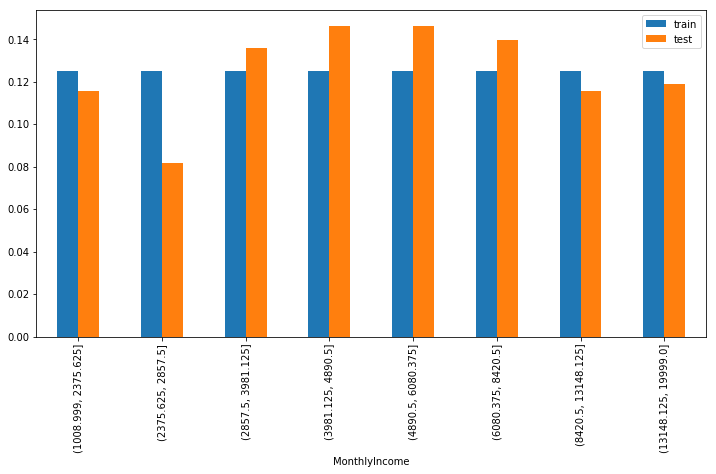

In [29]:
t1 = X_train.groupby(['MonthlyIncome'])['MonthlyIncome'].count() / np.float(len(X_train))
t2 = X_test.groupby(['MonthlyIncome'])['MonthlyIncome'].count() / np.float(len(X_test))

temp = pd.concat([t1, t2], axis = 1)
temp.columns = ['train', 'test']
temp.plot.bar(figsize=(12, 6))

### Engineering rare labels in categorical variables

In [30]:
# find unfrequent labels in categorical variables
for var in categorical:
    print(var, X_train[var].value_counts() / np.float(len(X_train)))
    print()

BusinessTravel Travel_Rarely        0.704932
Travel_Frequently    0.188776
Non-Travel           0.106293
Name: BusinessTravel, dtype: float64

Department Research & Development    0.664966
Sales                     0.289966
Human Resources           0.045068
Name: Department, dtype: float64

EducationField Life Sciences       0.405612
Medical             0.321429
Marketing           0.103741
Technical Degree    0.091837
Other               0.058673
Human Resources     0.018707
Name: EducationField, dtype: float64

Gender Male      0.610544
Female    0.389456
Name: Gender, dtype: float64

JobRole Sales Executive              0.207483
Research Scientist           0.199830
Laboratory Technician        0.183673
Manufacturing Director       0.097789
Healthcare Representative    0.090986
Manager                      0.071429
Sales Representative         0.056973
Research Director            0.053571
Human Resources              0.038265
Name: JobRole, dtype: float64

MaritalStatus Married   

All of the categorical variables seems nicely distributed, as none of the lablels have a distribution of less than 1%, so we'll leave these fields alone.

### Encode categorical variables

#### Number of labels: cardinality

In [31]:
for var in categorical:
    print(var, ' contains ', len(data[var].unique()), ' labels')

BusinessTravel  contains  3  labels
Department  contains  3  labels
EducationField  contains  6  labels
Gender  contains  2  labels
JobRole  contains  9  labels
MaritalStatus  contains  3  labels
OverTime  contains  2  labels


- Gender and OverTime: one hot encoding
- Remaining variables: replace by risk probability

In [32]:
for df in [X_train, X_test]:
    df['Gender'] = pd.get_dummies(df.Gender, drop_first = True)
    df['OverTime'] = pd.get_dummies(df.OverTime, drop_first = True)

In [33]:
def encode_categorical_variables(var, target):
    # make label to risk dictionary
    ordered_labels = X_train.groupby([var])[target].mean().to_dict()
    
    # encode variables
    X_train[var] = X_train[var].map(ordered_labels)
    X_test[var] = X_test[var].map(ordered_labels)

# encode labels in categorical vars
for var in categorical:
    encode_categorical_variables(var, 'Attrition')

In [34]:
# parse discretised variable to object before encoding
for df in [X_train, X_test]:
    df.MonthlyIncome = df.MonthlyIncome.astype('O')

In [35]:
# encode labels
encode_categorical_variables('MonthlyIncome', 'Attrition')

In [36]:
# let's inspect the dataset
X_train.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsSinceLastPromotion
473,49,0,0.154403,1245,0.132992,18,4,0.148847,638,4,0.169916,58,2,0.015873,3,0.092937,0.040816,2125,1,0.301775,17,3,3,1,5,3,20,0
1453,36,0,0.154403,1120,0.225806,11,4,0.229508,2045,2,0.150655,100,2,0.200820,4,0.135780,0.088435,14369,4,0.106205,13,3,1,1,2,2,6,0
743,59,0,0.154403,715,0.132992,2,3,0.148847,1032,3,0.150655,69,2,0.078261,4,0.254144,0.040816,21829,3,0.301775,13,3,1,0,4,3,5,4
562,33,1,0.154403,527,0.132992,1,4,0.101449,780,4,0.169916,63,3,0.144681,4,0.254144,0.265306,5207,1,0.301775,13,3,3,0,2,2,10,7
1310,58,0,0.238739,1216,0.132992,15,4,0.148847,1837,1,0.169916,87,3,0.015873,3,0.135780,0.040816,21624,2,0.301775,14,3,2,0,3,3,2,2


We can see that the labels have now been replaced by the Attrition probability.

### Feature scaling

In [37]:
X_train.describe()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsSinceLastPromotion
count,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000
mean,37.045918,0.162415,0.162415,807.255952,0.162415,9.059524,2.918367,0.162415,1018.935374,2.732143,0.162415,65.506803,2.719388,0.162415,2.727041,0.162415,0.162415,14378.864796,2.734694,0.162415,15.147959,3.144558,2.701531,0.796769,2.801020,2.745748,6.732143,2.121599
std,9.179789,0.368988,0.043226,403.201391,0.042113,7.861126,1.014014,0.041265,601.832567,1.085543,0.009396,20.066696,0.721345,0.093024,1.099083,0.063454,0.084622,7088.224439,2.530701,0.088544,3.606171,0.351804,1.079100,0.840682,1.283426,0.697094,5.333685,2.996681
min,18.000000,0.000000,0.080000,104.000000,0.132992,1.000000,1.000000,0.101449,2.000000,1.000000,0.150655,30.000000,1.000000,0.015873,1.000000,0.092937,0.040816,2094.000000,0.000000,0.106205,11.000000,3.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,30.000000,0.000000,0.154403,469.000000,0.132992,2.000000,2.000000,0.140212,478.750000,2.000000,0.150655,48.000000,2.000000,0.078261,2.000000,0.135780,0.108844,8410.000000,1.000000,0.106205,12.000000,3.000000,2.000000,0.000000,2.000000,2.000000,3.000000,0.000000
50%,36.000000,0.000000,0.154403,805.000000,0.132992,7.000000,3.000000,0.148847,1016.500000,3.000000,0.169916,65.000000,3.000000,0.144681,3.000000,0.135780,0.146259,14036.500000,2.000000,0.106205,14.000000,3.000000,3.000000,1.000000,3.000000,3.000000,5.000000,1.000000
75%,43.000000,0.000000,0.154403,1174.500000,0.225806,14.000000,4.000000,0.148847,1560.500000,4.000000,0.169916,83.000000,3.000000,0.222222,4.000000,0.254144,0.204082,20472.500000,4.000000,0.301775,18.000000,3.000000,4.000000,1.000000,3.000000,3.000000,9.000000,3.000000
max,60.000000,1.000000,0.238739,1499.000000,0.225806,26.000000,5.000000,0.250000,2068.000000,4.000000,0.169916,100.000000,4.000000,0.402985,4.000000,0.254144,0.312925,26999.000000,9.000000,0.301775,25.000000,4.000000,4.000000,3.000000,6.000000,4.000000,20.000000,11.000000


In [38]:
training_vars = [var for var in X_train.columns if var not in ['EmployeeNumber', 'Attrition']]
training_vars

['Age',
 'BusinessTravel',
 'DailyRate',
 'Department',
 'DistanceFromHome',
 'Education',
 'EducationField',
 'EnvironmentSatisfaction',
 'Gender',
 'HourlyRate',
 'JobInvolvement',
 'JobRole',
 'JobSatisfaction',
 'MaritalStatus',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'OverTime',
 'PercentSalaryHike',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StockOptionLevel',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsSinceLastPromotion']

In [39]:
# fit scaler
scaler = MinMaxScaler() # create an instance
scaler.fit(X_train[training_vars]) # fit the scaler to the train set

MinMaxScaler(copy=True, feature_range=(0, 1))

The scaler is now ready, we can use it in a machine learning algorithm when required.

### Machine Learning algorithm building

#### xgboost

In [40]:
# transforming the training and test datasets
X_train = X_train[training_vars].as_matrix()
X_test = X_test[training_vars].as_matrix()

In [41]:
xgb_model = xgb.XGBClassifier(random_state = 18)
eval_set = [(X_test, y_test)]
xgb_model.fit(X_train, y_train, eval_metric = "auc", eval_set = eval_set, verbose = False)

pred = xgb_model.predict_proba(X_train)
print('xgb train roc-auc: {}'.format(roc_auc_score(y_train, pred[:, 1])))
pred = xgb_model.predict_proba(X_test)
print('xgb test roc-auc: {}'.format(roc_auc_score(y_test, pred[:, 1])))
print('xgb test accuracy: {}'.format(xgb_model.score(X_test, y_test)))

xgb train roc-auc: 0.9752305525287692
xgb test roc-auc: 0.7796283309957925
xgb test accuracy: 0.8843537414965986


#### Random Forests

In [42]:
rf_model = RandomForestClassifier(random_state = 18)
rf_model.fit(X_train, y_train)

pred = rf_model.predict_proba(X_train)
print('RF train roc-auc: {}'.format(roc_auc_score(y_train, pred[:, 1])))
pred = rf_model.predict_proba(X_test)
print('RF test roc-auc: {}'.format(roc_auc_score(y_test, pred[:, 1])))
print('RF test accuracy: {}'.format(rf_model.score(X_test, y_test)))

RF train roc-auc: 0.9996412150849124
RF test roc-auc: 0.6530066619915849
RF test accuracy: 0.8537414965986394


#### Adaboost

In [43]:
ada_model = AdaBoostClassifier(random_state = 18)
ada_model.fit(X_train, y_train)

pred = ada_model.predict_proba(X_train)
print('Adaboost train roc-auc: {}'.format(roc_auc_score(y_train, pred[:, 1])))
pred = ada_model.predict_proba(X_test)
print('Adaboost test roc-auc: {}'.format(roc_auc_score(y_test, pred[:, 1])))
print('Adaboost test accuracy: {}'.format(ada_model.score(X_test, y_test)))

Adaboost train roc-auc: 0.9227150716240997
Adaboost test roc-auc: 0.7855890603085554
Adaboost test accuracy: 0.8809523809523809


#### Logistic regression

In [44]:
logit_model = LogisticRegression(random_state = 18)
logit_model.fit(X_train, y_train)

pred = logit_model.predict_proba(X_train)
print('Logit train roc-auc: {}'.format(roc_auc_score(y_train, pred[:, 1])))
pred = logit_model.predict_proba(X_test)
print('Logit test roc-auc: {}'.format(roc_auc_score(y_test, pred[:, 1])))
print('Logit test accuracy: {}'.format(logit_model.score(X_test, y_test)))

Logit train roc-auc: 0.7539160709065298
Logit test roc-auc: 0.7223001402524544
Logit test accuracy: 0.8503401360544217


### Feature importance

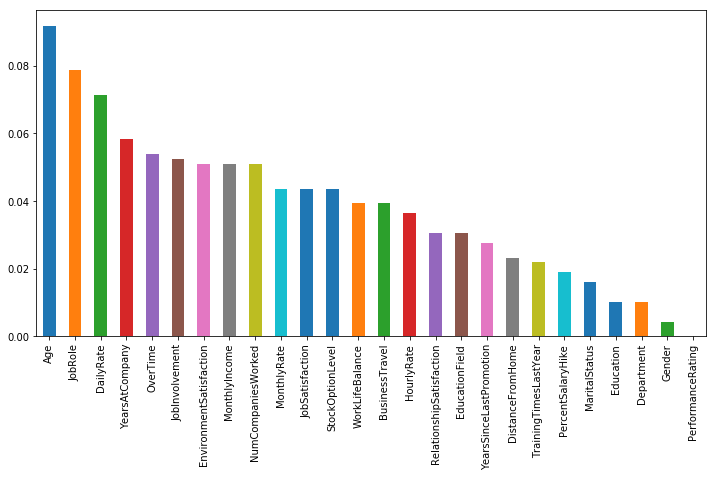

In [45]:
importance = pd.Series(xgb_model.feature_importances_)
importance.index = training_vars
importance.sort_values(inplace = True, ascending = False)
importance.plot.bar(figsize = (12, 6))

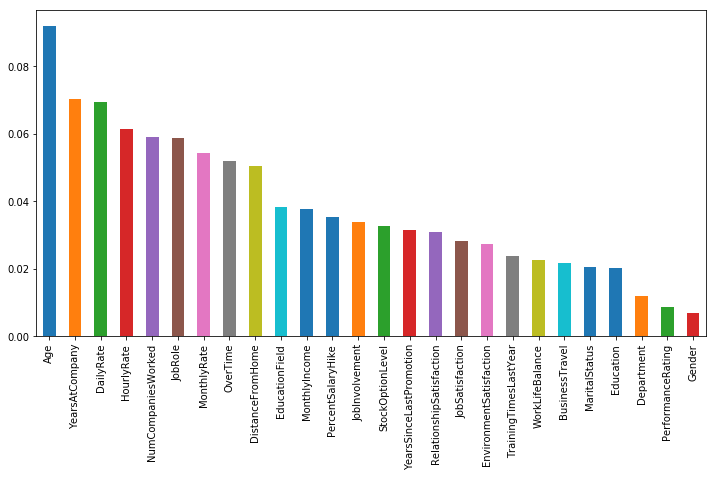

In [46]:
importance = pd.Series(rf_model.feature_importances_)
importance.index = training_vars
importance.sort_values(inplace = True, ascending = False)
importance.plot.bar(figsize = (12, 6))

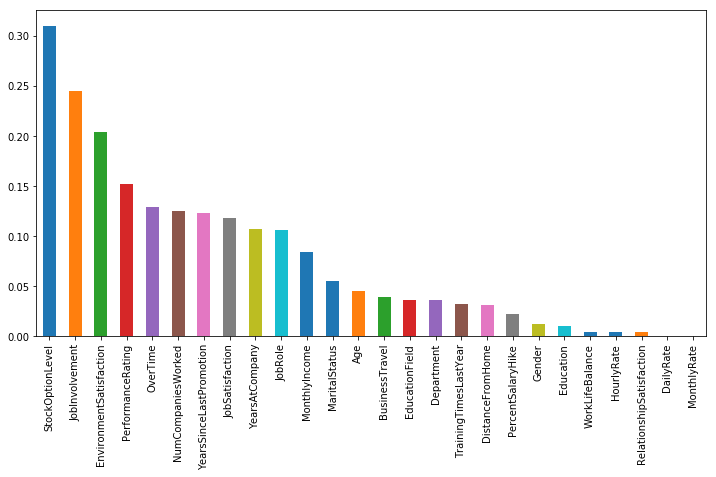

In [47]:
importance = pd.Series(np.abs(logit_model.coef_.ravel()))
importance.index = training_vars
importance.sort_values(inplace = True, ascending = False)
importance.plot.bar(figsize = (12, 6))

### Model Evaluation

In [48]:
def draw_roc(actual, preds):
    fpr, tpr, thresholds = metrics.roc_curve(actual, preds, drop_intermediate = False)
    auc_score = metrics.roc_auc_score(actual, preds)
    plt.figure(figsize = (6, 4))
    plt.plot(fpr, tpr, label = 'ROC curve (area = %0.2f)' % auc_score)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristics graph')
    plt.legend(loc = 'lower right')
    plt.show()
    
    return fpr, tpr, thresholds

I'm choosing xgboost as my final model to evaluate as it was giving some good inital stats

In [76]:
probs = xgb_model.predict_proba(X_test)
preds = probs[:, 1]
prob_func = lambda x: 1 if x >= 0.4 else 0
vfunc = np.vectorize(prob_func)
preds = vfunc(preds)

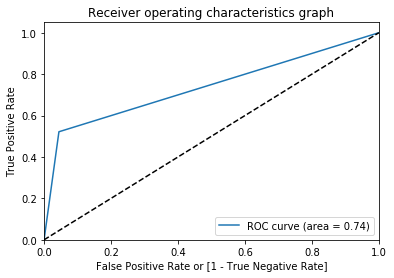

(array([0.        , 0.04435484, 1.        ]),
 array([0.        , 0.52173913, 1.        ]),
 array([2, 1, 0]))

In [77]:
draw_roc(y_test, preds)

In [78]:
# Create the confusion matrix
confusion = metrics.confusion_matrix(y_test, preds)
confusion

array([[237,  11],
       [ 22,  24]], dtype=int64)

In [79]:
TN = confusion[0, 0] # true negative
FP = confusion[0, 1] # false positive
FN = confusion[1, 0] # false negative
TP = confusion[1, 1] # true positive

In [80]:
# the sensitivity of model
TP / float(TP + FN)

0.5217391304347826